In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

# Load dataset (Change to your correct file path)
df = pd.read_csv("songs_normalize.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


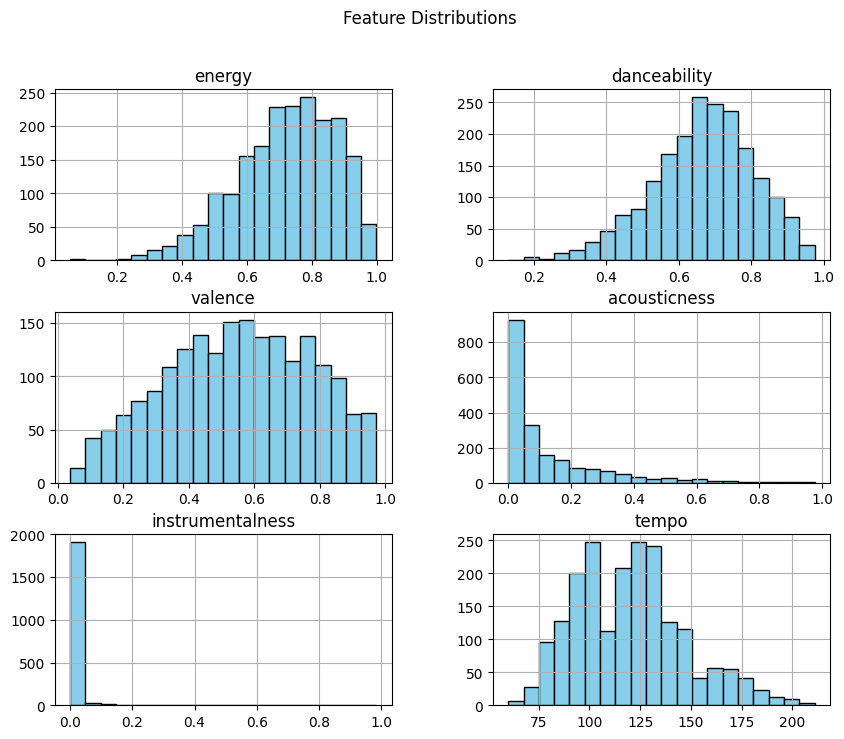

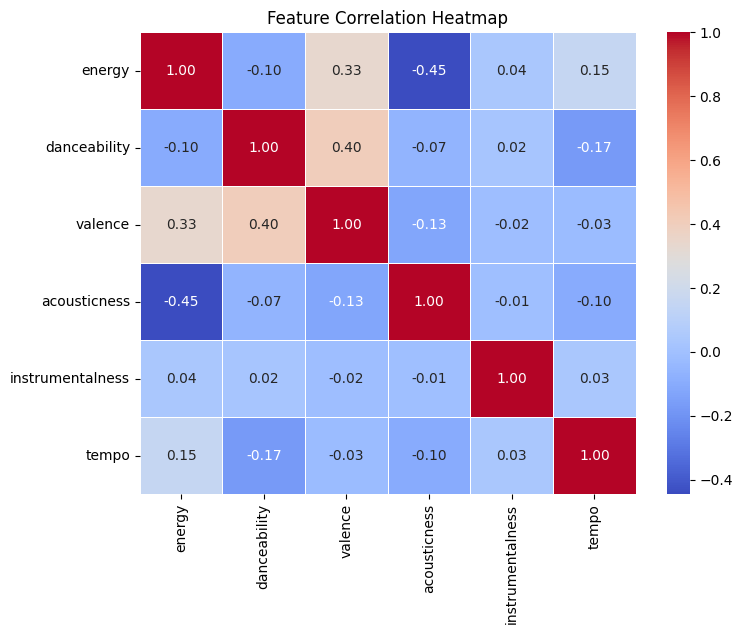

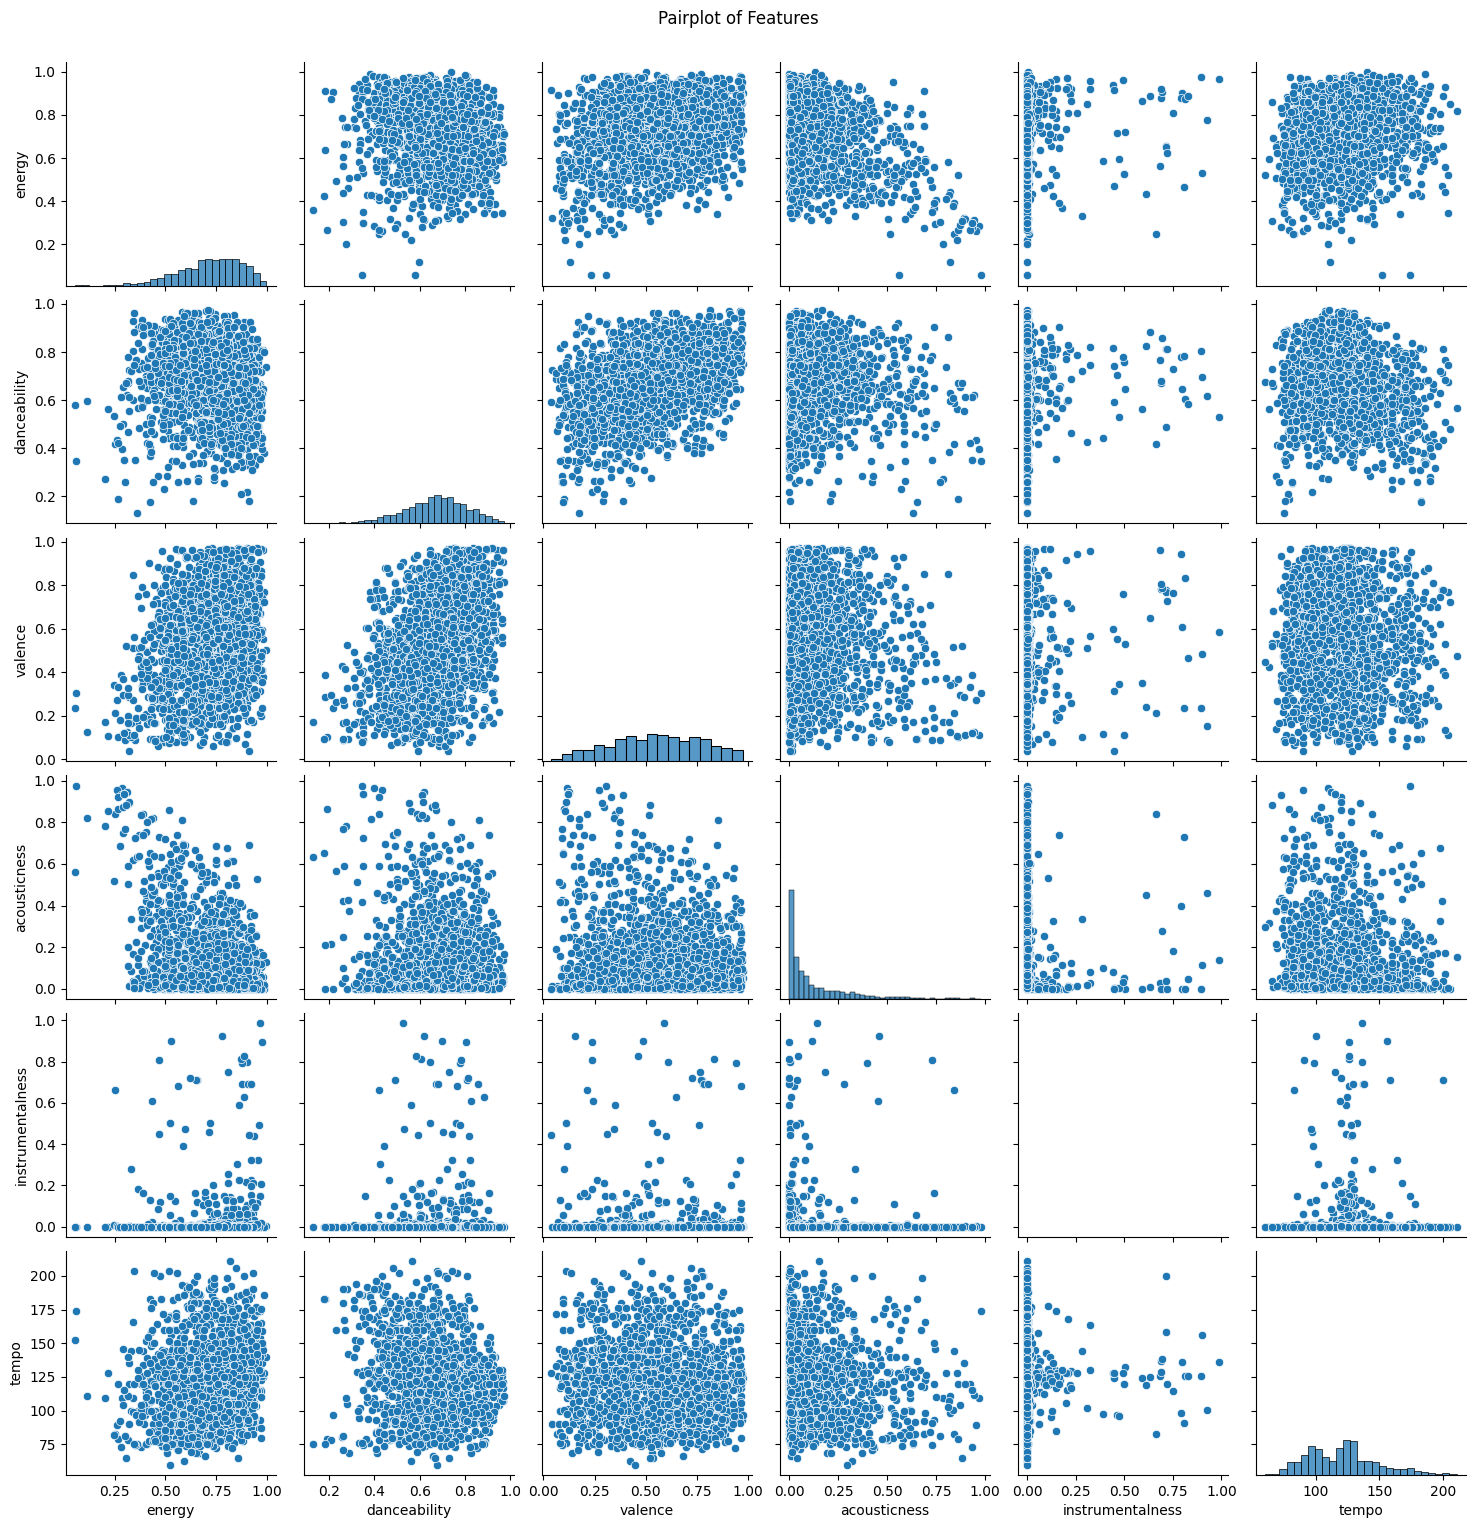

In [2]:
### EDA: Exploratory Data Analysis ###

# Display basic info
print(df.info())

# Display first 5 rows
print(df.head())

# Check for missing values
print("\nMissing Values in Dataset:\n", df.isnull().sum())

# Selecting only numerical features for EDA and clustering
features = ['energy', 'danceability', 'valence', 'acousticness', 'instrumentalness', 'tempo']

# Ensure all selected features exist
missing_features = [f for f in features if f not in df.columns]
if missing_features:
    raise KeyError(f"Missing columns in dataset: {missing_features}")

# Display statistical summary
print("\nStatistical Summary:\n", df[features].describe())

# 🔹 Histogram for feature distributions
df[features].hist(figsize=(10, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

# 🔹 Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# 🔹 Pairplot to visualize feature relationships
sns.pairplot(df[features])
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

In [3]:
### Data Preprocessing ###

# Selecting only relevant numeric features for clustering
X = df[features]

# Standardize features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

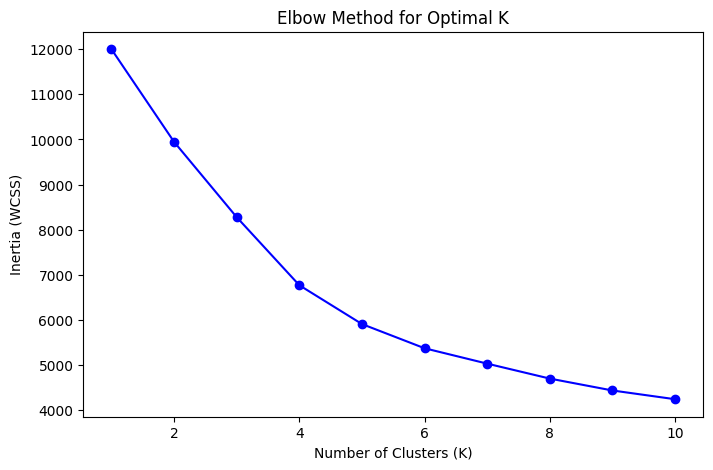

In [ ]:
### Using the Elbow Method to find the optimal K ###
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Elbow Method Plot
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.show()

In [ ]:
### Applying K-Means Clustering ###
optimal_k = 4  # K chosen based on graph formed above
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

### Evaluating the clustering performance using Silhouette Score ###
sil_score = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score for K={optimal_k}: {sil_score:.3f}")

Silhouette Score for K=4: 0.222


In [ ]:
### Interpretations ###

# Based on the Elbow Method, we get our optimal K to be 4
# The dataset was clustered into 4 groups based on energy, danceability, valence, acoustiness, instrumentalness and tempo
# Silhoutte Score of 0.22 suggests that the clustering is reasonably well-formed but a bit towards the over-lapping side of clusters

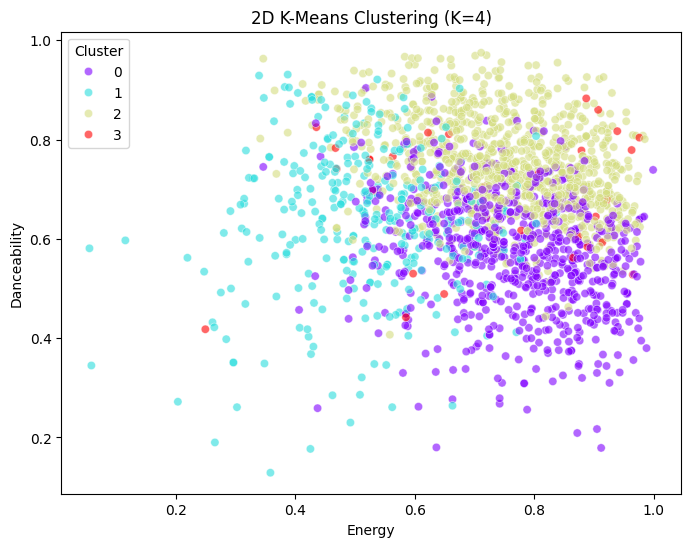

In [6]:
### 2D Cluster Visualization ###
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['energy'], y=df['danceability'], hue=df['Cluster'], palette='rainbow', alpha=0.6)
plt.xlabel("Energy")
plt.ylabel("Danceability")
plt.title(f"2D K-Means Clustering (K={optimal_k})")
plt.legend(title="Cluster")
plt.show()

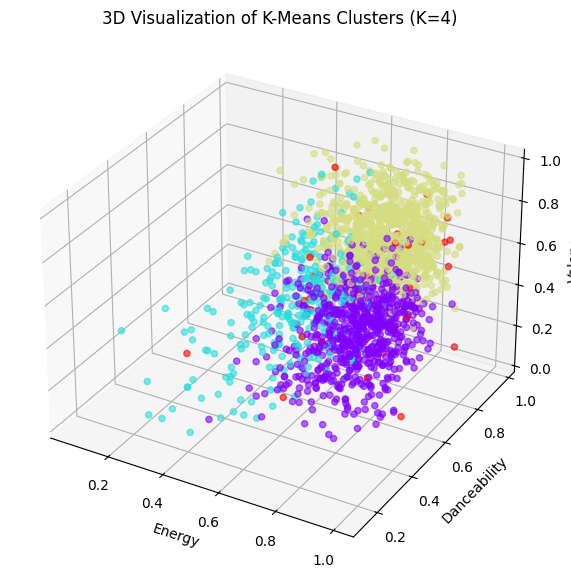

In [7]:
### 3D Cluster Visualization ###
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
ax.scatter(df['energy'], df['danceability'], df['valence'], c=df['Cluster'], cmap='rainbow', alpha=0.6)

# Labeling axes
ax.set_xlabel('Energy')
ax.set_ylabel('Danceability')
ax.set_zlabel('Valence')
ax.set_title(f'3D Visualization of K-Means Clusters (K={optimal_k})')

plt.show()

In [ ]:
### Interpretations ###

#Clusters Interpretations
#2D -> Songs are grouped into 4 clusters with distinct color representations
#   -> Some clusters contain high-energy, highly danceable songs, while others represent low-energy, less danceable tracks
#   -> The clusters are not strictly separated, indicating some overlap between genres and styles

#3D -> 3D Clusters vary in terms of three key attributes [Energy, Danceability, Valence]
#   -> Some clusters appear tightly packed, meaning songs in those groups have very similar characteristics

In [ ]:
#Arjun Ajithan Nadukandiyil
#2241119
#6BCA B